In [16]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
print(tf.__version__)

2.0.0


In [17]:
fashion_mnist = keras.datasets.fashion_mnist 
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [18]:
train_images.shape, len(train_labels)

((60000, 28, 28), 60000)

In [19]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

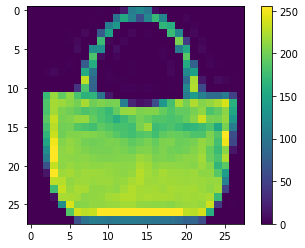

In [23]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()

In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

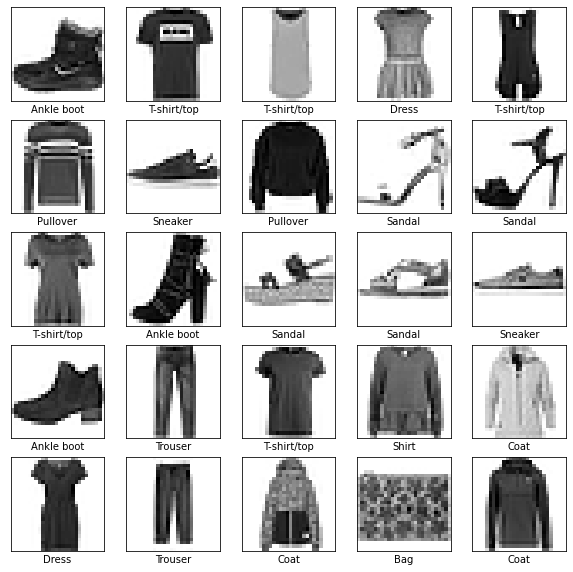

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation= 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])

In [31]:
model

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training

In [33]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.5124 - accuracy: 0.8128
Epoch 2/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.3938 - accuracy: 0.8543
Epoch 3/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.3650 - accuracy: 0.8663
Epoch 4/10
60000/60000 [==============================] - 14s 242us/sample - loss: 0.3446 - accuracy: 0.8731
Epoch 5/10
60000/60000 [==============================] - 15s 252us/sample - loss: 0.3259 - accuracy: 0.8805
Epoch 6/10
60000/60000 [==============================] - 15s 249us/sample - loss: 0.3161 - accuracy: 0.8827
Epoch 7/10
60000/60000 [==============================] - 15s 247us/sample - loss: 0.3048 - accuracy: 0.8864
Epoch 8/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.2968 - accuracy: 0.8905
Epoch 9/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.2892 - accuracy: 0.8

### Testing 

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2368 - accuracy: 0.8761

Test accuracy: 0.8761


### Prediciting

In [36]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [37]:
predictions = probability_model.predict(test_images)

In [42]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

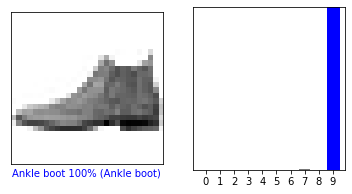

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

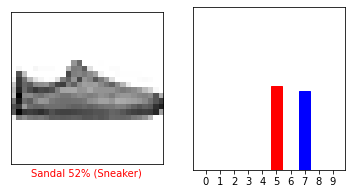

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

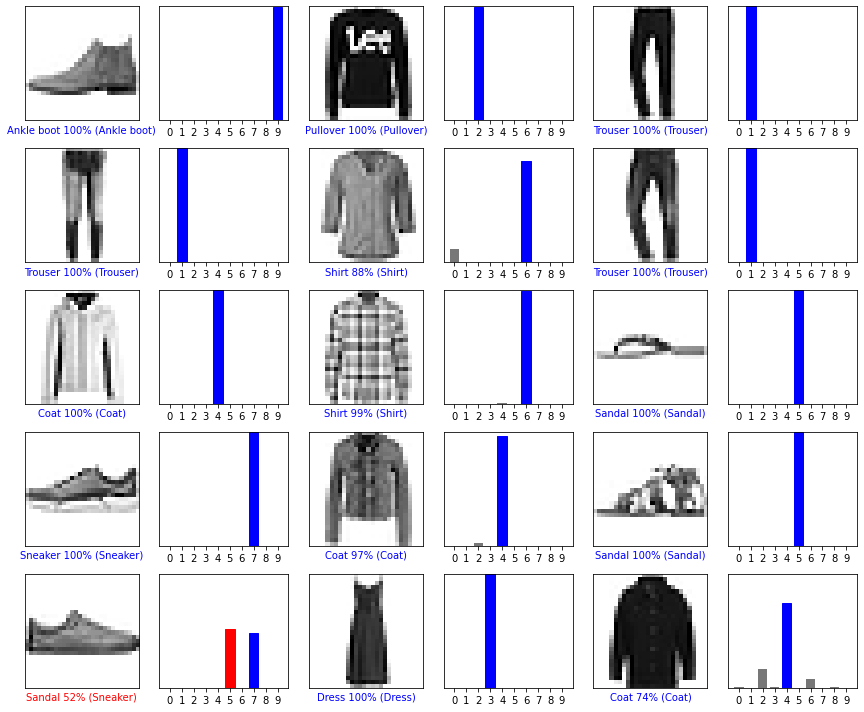

In [45]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

### End